# a-z of pandas methods

### A quocknote about this notebook.

This notebook gives a list of the methods used in the various DataCamp modukes on the Pandas Module. There is a working example of each method alongside the description to illustrate how the method works. The examples used are not from the DataCamp course but do use some of the same commonly known dataframes so they should be familiar to many Data Science students. 

The datasets are all in a subfolder in the repository named 'Data'.If you want to download it to work on your own machines. Also remember that some of the examples will chage the datasets, SO if you try to run any of the code and get something unexpected returned, you may need to reimport the dataset from the cell directly below this one and try again.

In [14]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import sample data
daylight=pd.read_csv("Data/daylight.csv", sep=',',parse_dates=True, index_col= 'Date')
sales=pd.read_csv("Data/bakerysales.csv", sep=',')
stock=pd.read_csv("Data/stock.csv", sep=',',parse_dates=True, index_col= 'date')
trials = pd.read_csv('Data/trials_03.csv',sep=',')
trials2=pd.read_csv('Data/trials_02.csv', sep=',')
users=pd.read_csv("Data/users.csv", sep=',')
gold=pd.read_csv("Data/gold.csv", sep=',')
silver=pd.read_csv("Data/silver.csv", sep=',')
bronze=pd.read_csv("Data/bronze.csv", sep=',')
hardware=pd.read_csv("Data/feb-sales-Hardware.csv", sep=',')
software=pd.read_csv("Data/feb-sales-Software.csv", sep=',')

#create sample dict
userdict = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],'city': ['Austin', 'Dallas', 'Austin', 'Dallas'] ,'visitors': [139, 237, 326, 456],'signups': [7, 12, 3, 5]}

#create sample dataframe
nandf = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],[np.nan, np.nan, np.nan, 5]], columns=list('ABCD'))
nandf2 = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
annual=pd.DataFrame([np.random.rand(12)],columns=list(['jan','feb','mar','apr','may','june','jul','aug','sep','oct','nov','dec']))

## .add()

The **.add()** method allows you to add elementwise based index.By default if any item does not exist in both sets it will return a nan if you want to display elemenst that only exist in one list you can add the argument **fill_value=0**, the arguent **axis=** can be used to add dataframes rowwise or columnwise.

To add more than 2 elements simply chain .add() methods.

This is a more flexible alternative to simply using sales['bread'] - sales['butter']

In [10]:
# .add()

sales['total']=sales['bread'].add(sales['butter'])
print(sales)

   bread  butter    city weekday  total
0    139      20  Austin     Sun    159
1    237      45  Dallas     Sun    282
2    326      70  Austin     Mon    396
3    456      98  Dallas     Mon    554


0    159
1    282
2    396
3    554
dtype: int64

In [22]:
# chained .add() with fill_value=0 

nandf['A'].add(nandf['B'],fill_value=0).add(nandf['C'],fill_value=0).add(1,fill_value=0).dropna()

0    3.0
1    8.0
2    1.0
dtype: float64

## .agg[()]

Allows you to define more than one aggregation function to computer at the same time.

In [8]:
# .agg[()]

sales.agg(['max','sum','mean'])

,bread,butter,city,weekday
max,456.0,98.00,Dallas,Sun
mean,289.5,58.25,NaN,NaN
sum,1158.0,233.00,AustinDallasAustinDallas,SunSunMonMon


In [9]:
# .groupby() and .agg[()] 
sales.groupby('city').agg(['max','sum'])

bread      butter      weekday        
         max  sum    max  sum     max     sum
city                                         
Austin   326  465     70   90     Sun  SunMon
Dallas   456  693     98  143     Sun  SunMon

## .apply

return the results from applying a list of functions, by default this applies to columns but it takes the argument axis=1 to apply it row wise.

In [195]:
sales.apply(['mean','std'])

,bread,butter
mean,289.500000,58.250000
std,134.735543,33.450212


In [193]:
sales.apply('mean',axis=1)

0     79.5
1    141.0
2    198.0
3    277.0
dtype: float64

## .astype('category')
allows you to treat columns containing categorical data as categorical data.

In [18]:
# .astype('category')
sales['weekday'].astype('category')

0    Sun
1    Sun
2    Mon
3    Mon
Name: weekday, dtype: category
Categories (2, object): [Mon, Sun]

## .columns()

displays the names of the columns

## .columns.name()
sales.columns.name='PRODUCTS'

In [43]:
print(sales.columns)
sales.columns.name='weekday'
print(sales)

Index(['bread', 'butter', 'city', 'weekday'], dtype='object', name='weekday')
weekday  bread  butter    city weekday
sales                                 
0          139      20  Austin     Sun
1          237      45  Dallas     Sun
2          326      70  Austin     Mon
3          456      98  Dallas     Mon


sales.columns.name=weekday
sales

## .count()

counts of the variable in a list

In [99]:
# .count()

sales['bread'].count()

4

## .describe()

returns statistical data from each column in a dataframe that contains numerical data.

In [132]:
# describe with defaut values only describes numeric values
users.describe()

,Unnamed: 0,visitors,signups
count,4.000000,4.000000,4.00000
mean,1.500000,289.500000,6.75000
std,1.290994,134.735543,3.86221
min,0.000000,139.000000,3.00000
25%,0.750000,212.500000,4.50000
50%,1.500000,281.500000,6.00000
75%,2.250000,358.500000,8.25000
max,3.000000,456.000000,12.00000


In [191]:
# .describe(include='all') decsibes both numerics and objects including top values and thier frequencies
users.describe(include='all')

,Unnamed: 0,weekday,city,visitors,signups
count,4.000000,4,4,4.000000,4.00000
unique,NaN,2,2,NaN,NaN
top,NaN,Mon,Dallas,NaN,NaN
freq,NaN,2,2,NaN,NaN
mean,1.500000,NaN,NaN,289.500000,6.75000
std,1.290994,NaN,NaN,134.735543,3.86221
min,0.000000,NaN,NaN,139.000000,3.00000
25%,0.750000,NaN,NaN,212.500000,4.50000
50%,1.500000,NaN,NaN,281.500000,6.00000
75%,2.250000,NaN,NaN,358.500000,8.25000


## .divide()

The **.divide()** method allows you to divide elements with the same index. By default if any item does not exist in both sets it will return a nan. You can divide columns within a datframe or across dataframes with the same index. 

Also see .add() .subtract() and .multiply() methods.

In [20]:
# .divide()

sales['bread/butter']=sales['bread'].divide(sales['butter'])
print(sales)

   bread  butter    city weekday  bread/butter
0    139      20  Austin     Sun      6.950000
1    237      45  Dallas     Sun      5.266667
2    326      70  Austin     Mon      4.657143
3    456      98  Dallas     Mon      4.653061


In [17]:
sales['boxes butter']=sales['butter'].divide(12)
print(sales)

   bread  butter    city weekday  boxes butter
0    139      20  Austin     Sun      1.666667
1    237      45  Dallas     Sun      3.750000
2    326      70  Austin     Mon      5.833333
3    456      98  Dallas     Mon      8.166667


## dropna()

drops rows or columns if values are nan

In [218]:
# dropna().count() returns the number of values left if nans are dropped
nandf.dropna(axis=1, how='all').count()

A    1
B    2
D    3
dtype: int64

In [187]:
# dropna() drop column if all values are nan
nandf.dropna(axis=1, how='all')

,A,B,D
0,NaN,2.0,0
1,3.0,4.0,1
2,NaN,NaN,5


In [188]:
# dropna() drop column if any values are nan
nandf.dropna(axis=1, how='any')

,D
0,0
1,1
2,5


In [189]:
# dropna() drop row if all values are nan
nandf.dropna(axis=0, how='all')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [190]:
# dropna() drop row if any values are nan
nandf.dropna(axis=0, how='any')

,A,B,C,D


## .fillna()

used to fill in values for nan values

In [201]:
# fillna(0) replaces nan with a set value
nandf.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5


In [202]:
# fillna() replace nan with the mean value
nandf.fillna(nandf.mean())

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5


In [203]:
# fillna(method='ffill') replaces nan with the same value as the next valid value
nandf.fillna(method='ffill')

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5


In [204]:
# fillna(method='bfill') replaces nan with the same value as the last valid value
nandf.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


## pd.get_dummies()

pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

Used to convert categorical columns to columns of dummy variables

In [18]:
import pandas as pd
sales2=pd.get_dummies(sales, prefix=['City', 'Day'],prefix_sep='_')
print(sales2)

   bread  butter  City_Austin  City_Dallas  Day_Mon  Day_Sun
0    139      20            1            0        0        1
1    237      45            0            1        0        1
2    326      70            1            0        1        0
3    456      98            0            1        1        0


## .groupby()

Allows you to reduce and aggregate a dataset.

In [13]:
# .groupby()
sales.groupby('weekday').count()

,bread,butter,city
weekday,,,
Mon,2,2,2
Sun,2,2,2


In [12]:
# .groupby() for multiple columns
sales.groupby('weekday')[['bread','butter']].sum()

,bread,butter
weekday,,
Mon,782,168
Sun,376,65


In [14]:
# .groupby() for multiple indexes
sales.groupby(['city','weekday']).sum()

bread  butter
city   weekday               
Austin Mon        326      70
       Sun        139      20
Dallas Mon        456      98
       Sun        237      45

## .head()

prints the first x rows

In [24]:
# .head()

sales.head()

,bread,butter,city,weekday
0,139,20,Austin,Sun
1,237,45,Dallas,Sun
2,326,70,Austin,Mon
3,456,98,Dallas,Mon


## .idxmax()

Returns the row or column label where maximum value is located.

In [26]:
sales.bread.idxmax() # returns label of row with max value

3

In [47]:
annual.idxmax(axis='columns') # returns labels of column with max value

0    dec
dtype: object

## .idxmin()

Returns the row or column label where minimum value is located.

In [27]:
sales.bread.idxmax()

3

## .iloc

allows you to select data by row and column index

In [27]:
# .loc
sales.iloc[1,1]

45

## .index()

displays the index

## .index.name

display or allows you to set an index name

## .index.names

displays or allows you to set the names of hierarcal indexes

In [29]:
# .index

sales.index

RangeIndex(start=0, stop=4, step=1)

In [38]:
# .index.name
sales.index.name='sales' # sets the name for the index
sales

,bread,butter,city,weekday
sales,,,,
0,139,20,Austin,Sun
1,237,45,Dallas,Sun
2,326,70,Austin,Mon
3,456,98,Dallas,Mon


## .info()

returns information about the dataframe including its type, the range of the index, a list of the column names along with how many entries there are in each column, and what type of data is stored in the column along with the memory usage of the dataframe.

In [183]:
## .info()

trials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
id           8 non-null int64
treatment    8 non-null object
gender       8 non-null object
response     8 non-null int64
dtypes: int64(2), object(2)
memory usage: 336.0+ bytes


## .interpolate()

fills in gaps in a linear series

In [215]:
print(nandf2.dropna().count()) #number of rows with data before
nandf2.interpolate().count()#number of rows with data after

A    4
B    4
dtype: int64


A    6
B    6
dtype: int64

In [211]:
nandf2.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


## .join()

The .join method can be used to join 2 dataframes

Arguments include, how='left','right','inner'or'outer', lsuffix='' or rsuffix='', on=''

In [22]:
gold.join(silver,how='left',on='NOC',lsuffix='_gold').head()

,NOC_gold,Country_gold,Total_gold,NOC,Country,Total
0,USA,United States,2088.0,NaN,NaN,NaN
1,URS,Soviet Union,838.0,NaN,NaN,NaN
2,GBR,United Kingdom,498.0,NaN,NaN,NaN
3,FRA,France,378.0,NaN,NaN,NaN
4,GER,Germany,407.0,NaN,NaN,NaN


## .loc

allows you to select data by row and column name

In [26]:
# .loc
sales.loc[1,'butter']

45

## .nunique()

Returns the count of the unique variables in an array.

In [17]:
# .nunique()
sales['weekday'].nunique()

2

## .map()

used to map one value to another

In [2]:
import pandas as pd

# define series x and y 
x=pd.Series([1,2,3], index=['one', 'two', 'three'])
y=pd.Series(['a', 'b', 'c'], index=[1,2,3])

# map x to y
x.map(y)

one      a
two      b
three    c
dtype: object

## .max()

returns the maximum value in a list

In [102]:
# .max()
sales['bread'].max()

456

## .mean()

computes the mean of the values

In [98]:
#.mean()
sales['bread'].mean()

289.5

## .median()

computes the median average value.

In [144]:
#.median()
sales['bread'].median()

281.5

## .min()
returns the minimum value in a list.

In [104]:
# .min()
sales['bread'].min()

139

## .mode()

computes the mode average value.

In [147]:
sales['butter'].mode()

0    20
1    45
2    70
3    98
dtype: int64

## .multiply()

The **.multiply()** method allows you to multiple elements with the same index. By default if any item does not exist in both sets it will return a nan. You can divide columns within a datframe or across dataframes with the same index. The arguent **axis=** can be used to subtract dataframes rowwise or columnwise.

Also see .add() .subtract() and .multiply() methods.

In [13]:
# .multiply()

sales['bread * butter']=sales['bread'].multiply(sales['butter'])
print(sales)

   bread  butter    city weekday     total  bread/butter  bread * butter
0    139      20  Austin     Sun  6.950000      6.950000            2780
1    237      45  Dallas     Sun  5.266667      5.266667           10665
2    326      70  Austin     Mon  4.657143      4.657143           22820
3    456      98  Dallas     Mon  4.653061      4.653061           44688


## pd.Categorical()

returns information about category usage, allowing you to define the values of categorical data along with prefered sort order.

In [49]:
pd.Categorical(values=sales.city,categories=['Austin', 'Dallas'],ordered=True)

[Austin, Dallas, Austin, Dallas]
Categories (2, object): [Austin < Dallas]

## pd.DataFrame()

converts a dictionary into a dataframe, the keys become columns in the dataframe and values rows, indexes are created if an index was not specified.

In [143]:
pd.DataFrame(userdict, index=list(userdict['city']))


,city,signups,visitors,weekday
Austin,Austin,7,139,Sun
Dallas,Dallas,12,237,Sun
Austin,Austin,3,326,Mon
Dallas,Dallas,5,456,Mon


In [184]:
# dataframe from series
pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1],[np.nan, np.nan, np.nan, 5]], columns=list('ABCD'))

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


# pd.IndexSlice

Allows you create slices with a more natural syntax using : rather than using slice(None)

instead of dfmi.loc[(slice('A1','A3'), slice(None), ['C1', 'C3']), :]

you can use

idx = pd.IndexSlice

dfmi.loc[idx[:, :, ['C1', 'C3']], idx[:, 'foo']]

## pd.melt()

Melting provides a way of flattening a dataset so that data has fewer columns and more rows. 

In [94]:
# .melt()

pd.melt(trials2)

,variable,value
0,treatment,A
1,treatment,B
2,F,5
3,F,8
4,M,3
5,M,9


In [5]:
pd.melt(trials, id_vars=['treatment'],var_name='gender', value_name='response').head()

,treatment,gender,response
0,A,id,1
1,A,id,2
2,A,id,3
3,A,id,4
4,B,id,5


## pd.merge()

••pd.merge()•• extend the functionality of **pd.concat()** allowing alignment of rows with multiple columns.

In [4]:
# Merging on a column
pd.merge(gold,silver,on='NOC').head()

,NOC,Country_x,Total_x,Country_y,Total_y
0,USA,United States,2088.0,United States,1195.0
1,URS,Soviet Union,838.0,Soviet Union,627.0
2,GBR,United Kingdom,498.0,United Kingdom,591.0
3,FRA,France,378.0,France,461.0
4,GER,Germany,407.0,Germany,350.0


In [7]:
# Merging on multiple columns
pd.merge(gold,silver,on=['NOC','Country'],suffixes=['_gold', '_silver']).head()

,NOC,Country,Total_gold,Total_silver
0,USA,United States,2088.0,1195.0
1,URS,Soviet Union,838.0,627.0
2,GBR,United Kingdom,498.0,591.0
3,FRA,France,378.0,461.0
4,GER,Germany,407.0,350.0


## pd.merge_asof()

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

This function can be use to align disparate datetime frequencies without having to first resample.

## pd.merge_ordered()

pd.merge_ordered() is actually just a shorthand way to do a pd.merge with argument with how='outer' chained to a .sort_values('Date')

In [29]:
## pd.merge_ordered()

# pd.merge(hardware, software, how='outer').sorted_values('Date') 
pd.merge_ordered(hardware, software).head()

,Date,Company,Product,Units
0,2015-02-02 08:33:01,Hooli,Software,3
1,2015-02-02 20:54:49,Mediacore,Hardware,9
2,2015-02-03 14:14:18,Initech,Software,13
3,2015-02-04 15:36:29,Streeplex,Software,13
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14


In [30]:
## pd.merge_ordered()

pd.merge_ordered(hardware, software, on=['Date', 'Company'],suffixes=['_hardware', '_software']).head() 

,Date,Company,Product_hardware,Units_hardware,Product_software,Units_software
0,2015-02-02 08:33:01,Hooli,NaN,NaN,Software,3.0
1,2015-02-02 20:54:49,Mediacore,Hardware,9.0,NaN,NaN
2,2015-02-03 14:14:18,Initech,NaN,NaN,Software,13.0
3,2015-02-04 15:36:29,Streeplex,NaN,NaN,Software,13.0
4,2015-02-04 21:52:45,Acme Coporation,Hardware,14.0,NaN,NaN


## pd.read_csv()

reads the content of a csv file into memory

In [112]:
sales=pd.read_csv("Data/bakerysales.csv", sep=',')

## .pct_change() 

Returns the percentage change in values between rows. Note the first value returned is always a Nan as there is no previous row to compare with.

In [29]:
# .pct_change() 

sales['bread'].pct_change().multiply(100)

0          NaN
1    70.503597
2    37.552743
3    39.877301
Name: bread, dtype: float64

## .pivot()

pivot is used to reshape dataframes

In [68]:
# .pivot()

users.pivot(index='weekday',columns='city')

Unnamed: 0        visitors        signups       
city        Austin Dallas   Austin Dallas  Austin Dallas
weekday                                                 
Mon              2      3      326    456       3      5
Sun              0      1      139    237       7     12

In [73]:
# .pivot() with stated values

users.pivot(index='weekday',columns='city', values='visitors')

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


# .pivot_table()

While .pivot and pd.melt() are both very useful tools .pivot() does not always work, because it requires unique index column pairs to identify values in the dataframe. If there are duplicate column pairs, .pivot() will generate an error. Here you would use .pivot_table() instead. .pivot_table() works much like pivot but producing sumarizing variables and their values.

In [96]:
trials.pivot_table(index='treatment',columns='gender',values='response',aggfunc='count')

gender,F,M
treatment,,
A,2,2
B,3,1


## .plot()

plots a dataframe

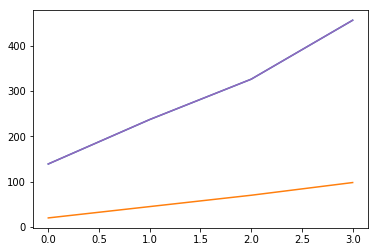

In [138]:
plt.plot(sales['bread'])
plt.show()

## .quantile

effectiley returns values at given intervals

In [156]:
sales['bread'].quantile([0.05,0.95])

0.05    153.7
0.95    436.5
Name: bread, dtype: float64

## .resample

recomputes values over a different time period

In [173]:
stock['high']['2013-jan-01':'2013-feb-01'].resample('W').mean()

date
2013-01-06    448.8300
2013-01-13         NaN
2013-01-20    505.7800
2013-01-27    486.2075
2013-02-03    478.0580
Freq: W-SUN, Name: high, dtype: float64

## .rolling

computes rolling means (moving averages) - generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

In [174]:
stock['high']['2013-jan-01':'2013-feb-01'].rolling(window=4).mean()

date
2013-02-01         NaN
2013-01-14         NaN
2013-01-15         NaN
2013-01-16    517.7325
2013-01-17    506.6700
2013-01-18    505.3500
2013-01-22    507.5725
2013-01-23    508.9600
2013-01-24    497.7050
2013-01-25    486.2075
2013-01-28    472.5400
2013-01-29    458.8425
2013-01-30    458.0600
2013-01-31    458.8225
2013-01-02    460.3900
2013-01-03    454.8850
Name: high, dtype: float64

## .set_index()

allows you to set a column as an index

## .shape()

returns the number of rows and columns in a dataframe.

In [110]:
# .shape()

trials.shape

(8, 4)

## .sort_index()

sorts the index

## .sort_values( )

returns a dataframe sorted by column

In [18]:
sales.sort_values(ascending=[True,False],by=['city','bread'])

,bread,butter,city,weekday
2,326,70,Austin,Mon
0,139,20,Austin,Sun
3,456,98,Dallas,Mon
1,237,45,Dallas,Sun


## .stack()

makes a dataframe narrower and longer, by removing columns to indexs

In [82]:
trials.stack(level=0)

0  id           1
   treatment    A
   gender       F
   response     5
1  id           2
   treatment    A
   gender       M
   response     3
2  id           3
   treatment    A
   gender       M
   response     8
3  id           4
   treatment    A
   gender       F
   response     9
4  id           5
   treatment    B
   gender       F
   response     1
5  id           6
   treatment    B
   gender       M
   response     8
6  id           7
   treatment    B
   gender       F
   response     4
7  id           8
   treatment    B
   gender       F
   response     6
dtype: object

## .std()

computes the standard deviation in a list of variables.

In [101]:
# .std()
sales['bread'].std()

134.73554344220634

## .str

allows you to use some of the sprecial features of strings

### .str.contains('')
filters out string containing given values
### .str.lower()
converts a string to lower case
### .str.strip()
strips out unwanted white space
### .str.upper()
converts a string to upper case

In [178]:
(users['city'].str.upper())

0    AUSTIN
1    DALLAS
2    AUSTIN
3    DALLAS
Name: city, dtype: object

In [181]:
users[users['city'].str.contains('Austin')]

,Unnamed: 0,weekday,city,visitors,signups
0,0,Sun,Austin,139,7
2,2,Mon,Austin,326,3


## .subtract()

The **.subtract()** method allows you to subtract elements with the same index. By default if any item does not exist in both indexes it will return a nan if you want to display elemenst that only exist in one list or the other you can add the argument **fill_value=0**,the arguent **axis=** can be used to subtract dataframes rowwise or columnwise.

To add more than 2 elements simply chain .add() methods.

This is an alternative to simply using sales['bread'] - sales['butter']

In [23]:
# chained .subtract() with fill_value=0 

nandf['A'].subtract(nandf['B'],fill_value=0).subtract(nandf['C'],fill_value=0).subtract(1,fill_value=0).dropna()

0   -3.0
1   -2.0
2   -1.0
dtype: float64

## .sum()

computes the sum of the values in a list

In [105]:
sales['bread'].sum()

1158

## .swaplevel()

In a hierarachal index structure we have outer and inner indexes. For example by gender then treatment, if we wanted to swop that over to treatment then gender we would use the .swaplevel() method. Note. the positions of the index swopped but the index is not necessarily reordered, for that we also need to apply.sort_index()

In [ ]:
#.swaplevel()

stacked.swaplevel(0, 1)

## .tail()

returns the last x rows

In [83]:
# .tail()

sales.tail()

,bread,butter,city,weekday
0,139,20,Austin,Sun
1,237,45,Dallas,Sun
2,326,70,Austin,Mon
3,456,98,Dallas,Mon


## .to_csv()

exports a dataframe to comma separated values (csv)

In [133]:
sales.to_csv('Data/out.csv', index=False)

## .to_excel()

exports a dataframe as an excel .xlsx file

In [134]:
sales.to_excel('Data/out.xlsx')

## .transform()

transform applies functions

In [ ]:
sales.transform()

## .unique()

Returns the values of the unique variables in an array.

In [15]:
# .unique()
sales['weekday'].unique()

array(['Sun', 'Mon'], dtype=object)

## .unstack()

The .pivot() method will not work on dataframes with a hierarchical index (as created in ch2) instead you have to use method .unstack to create move come of the index levels to columns making the dataframe wider and shorted (more columns fewer rows).

In [85]:
# .unstack()

# Unstack users by 'weekday'
users.unstack(level='weekday')

Unnamed: 0  0         0
            1         1
            2         2
            3         3
weekday     0       Sun
            1       Sun
            2       Mon
            3       Mon
city        0    Austin
            1    Dallas
            2    Austin
            3    Dallas
visitors    0       139
            1       237
            2       326
            3       456
signups     0         7
            1        12
            2         3
            3         5
dtype: object

## .values

returns the values from a pandas dataframe as a numpy array.

In [111]:
sales.values

array([[139, 20, 'Austin', 'Sun'],
       [237, 45, 'Dallas', 'Sun'],
       [326, 70, 'Austin', 'Mon'],
       [456, 98, 'Dallas', 'Mon']], dtype=object)

## .value_counts()

returns object containing counts of unique values in descending order, so that the first element is the most frequently occurring element. Excludes NA values by default.

In [10]:
import pandas as pd

sales['city'].value_counts()

Austin    2
Dallas    2
Name: city, dtype: int64

## .var()

computes the variance.

In [158]:
# .var()
sales['bread'].var()

18153.666666666668